In [1]:
# Some imports
import numpy as np
import matplotlib.pyplot as plt

The Hamiltonian of the Cooper box is given by
$$
H = E_C \sum_N (N-N_g)^2 |N \rangle \langle N |
- 
\frac{1}{2}E_J \sum_N
\big[
|N+1\rangle \langle N| +  |N-1\rangle \langle N|
\big]
$$
For simplicity, we set $E_C = 1$ and measure all energies relative to $E_C$. We treat the second term as a perturbation, i.e. we assume that $E_J << 1$. The following function calculates the eigenvalues of the unperturbed Hamiltonian


In [2]:
####################################################
# Return the energy eigenvalues of the unperturbed #
# Hamiltonian (the diagonal part)                  #
####################################################
def E0(N, Ng):
    return (N-Ng)**2



Now we plot the eigenvalues for different values of $N_g$. We plot four curves, corresponding to N=0,1,2,3

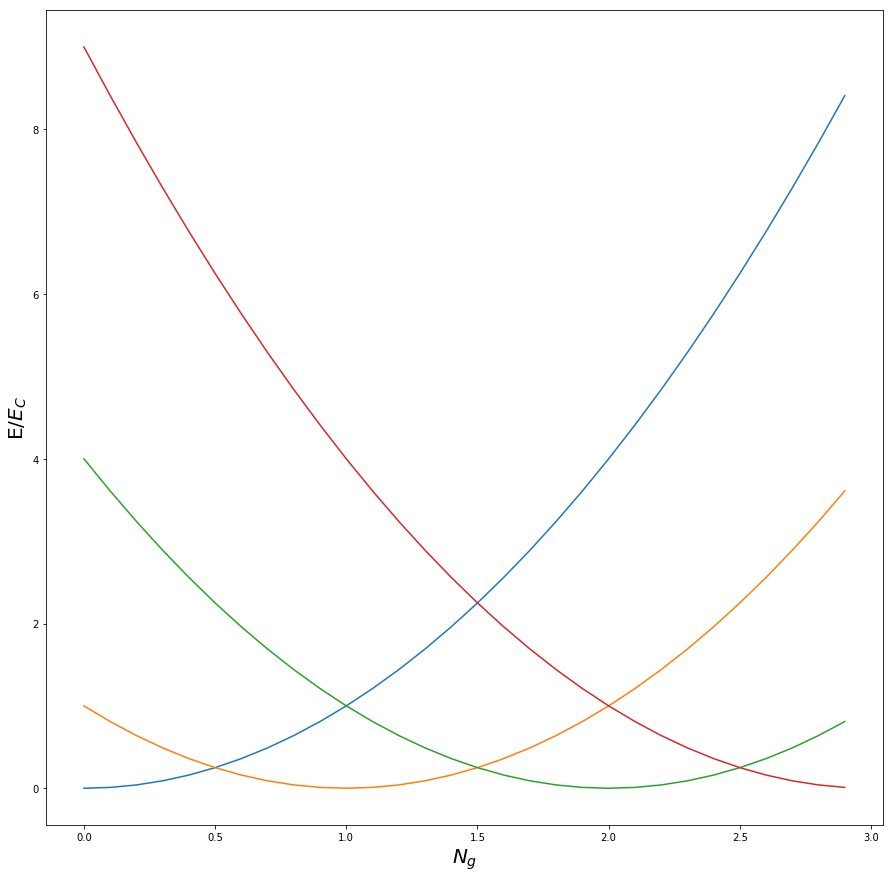

In [3]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
R = np.arange(0,3,0.1)
ax.plot(R,E0(0,R))
ax.plot(R,E0(1,R))
ax.plot(R,E0(2,R))
ax.plot(R,E0(3,R))
ax.set_ylabel("E/$E_C$",fontsize=20)
ax.set_xlabel("$N_g$", fontsize=20)
plt.show()

We now study the behaviour for non-zero values of $E_0$. To do this, we approximate the Hamiltonian by the Hamiltonian on a finite subspace. This is a hermitian matrix for which we can find the eigenvalues using standard methods

In [4]:
#######################################################
# Return a finite part of the Hamiltonian             #
# N = number of rows / columns                        #
# E0 = energy of Josephson junction                   #
# Ec = characteristic energy of capacitors            #
# Ng = gate voltage                                   #
#######################################################
def hamiltonian(Ec,E0,Ng,N):
    H0 = Ec * np.diag((np.arange(0, N)-Ng)**2, 0)
    V = -0.5*E0 * np.diag(np.ones(N-1),1)   -0.5*E0 * np.diag(np.ones(N-1),-1)
    return H0 + V


In [5]:
#######################################################
# Return an approximation of the n-th energy          #
# E0 = energy of Josephson junction                   #
# Ec = characteristic energy of capacitors            #
# Ng = gate voltage                                   #
#######################################################
def solve(Ec,E0,Ng,n, prec=10):
    H = hamiltonian(Ec, E0, Ng, max(10,prec))
    E, v = np.linalg.eig(H)
    s = np.argsort(E)
    return E[s[n]], v[s[n]]

Now we again plot the first few eigenvalues

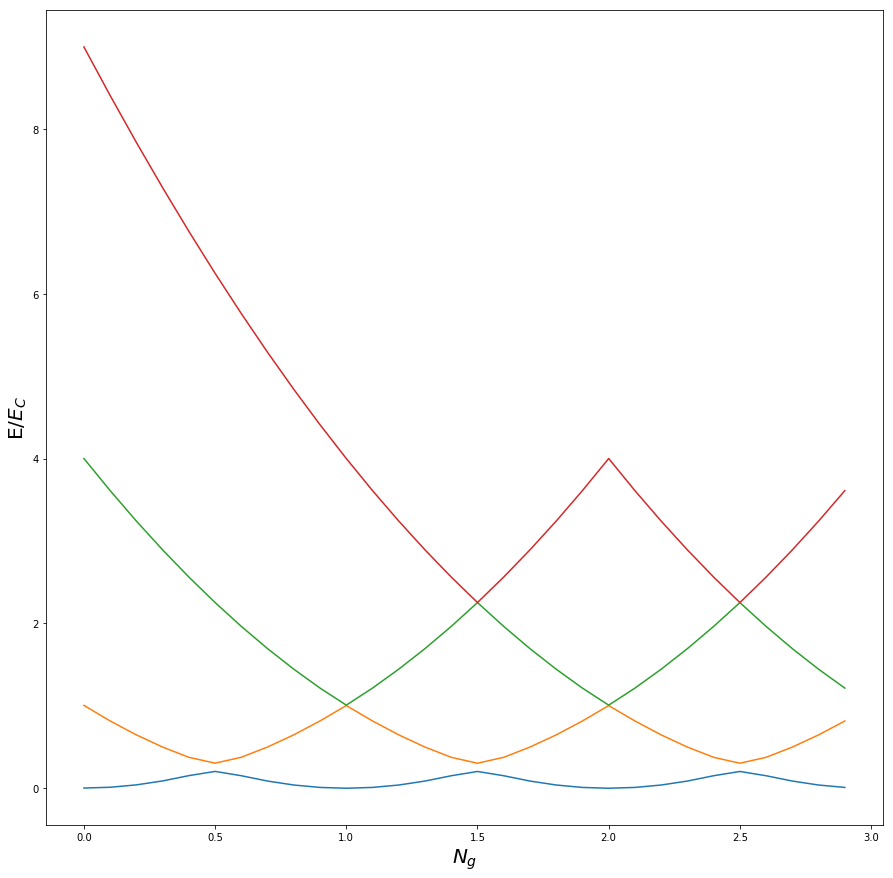

In [6]:
#########################################
# Plot the n-th eigenvalue depending on #
# the arrary R with Ng-values           #
#########################################
def plot(axis, E0, R,n, prec=10):
    y = []
    for r in R:
        E,_ = solve(1, E0, r, n, prec=prec)
        y.append(E)
    axis.plot(R,y)



fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
E0 = 0.1
prec = 10
plot(ax, E0=E0, R=R, n=0, prec=prec)
plot(ax, E0=E0, R=R, n=1, prec=prec)
plot(ax, E0=E0, R=R, n=2, prec=prec)
plot(ax, E0=E0, R=R, n=3, prec=prec)
ax.set_ylabel("E/$E_C$",fontsize=20)
ax.set_xlabel("$N_g$", fontsize=20)


plt.show()

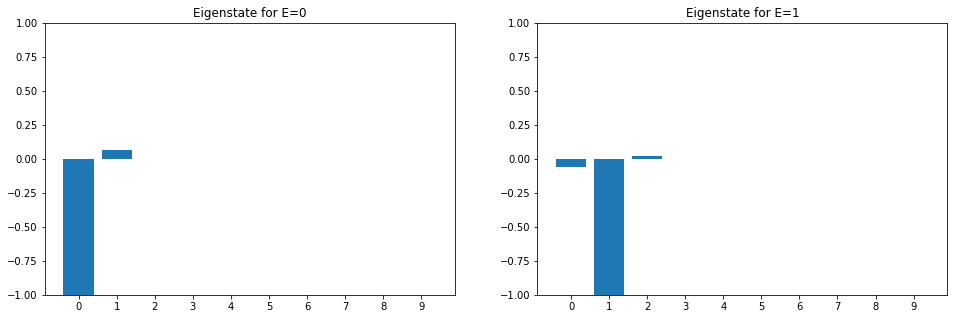

In [10]:
#####################################################
# Now plot the eigenstates in the N-representation  #
# at the point Ng                                   #
#####################################################
Ng = 0.5
fig = plt.figure(figsize=(25,5))
vectors = 2
for i in range(vectors):
    ax = fig.add_subplot(1,vectors+1,i+1)
    _,v = solve(1, E0=E0, Ng=Ng, n = i)
    v = v / np.linalg.norm(v)
    ax.bar(range(prec), v)
    ax.set_ylim(-1, 1)
    ax.set_xticks(range(prec))
    ax.set_title("Eigenstate for E="+str(i))


plt.show()